In [1]:
import pandas as pd
import sklearn

In [2]:
carSeats = pd.read_csv('CarSeats.csv')

In [3]:
print(carSeats.head())

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:
#Removing all categorical features.

catCols = carSeats.select_dtypes("object").columns
print(catCols)

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')


In [5]:
carSeats.drop(columns = catCols, inplace = True)

In [6]:
from sklearn.preprocessing import StandardScaler
#creating an object of class StandardScaler
scaler = StandardScaler()

In [8]:
targetCol = carSeats['Sales']

In [9]:
targetCol.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [10]:
numCols = carSeats.select_dtypes("number").columns
print(numCols)
trainCols = carSeats.copy()
#makes a deep copy
Y = trainCols['Sales']
trainCols.head()
x = trainCols.drop(columns = 'Sales')

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')


In [11]:
x[:5]

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13


In [13]:
scaler.fit(x)
scaled_X = scaler.transform(x)

In [71]:
#for col in scaled_X.columns:
#    print(col, "mean:", scaled_X[col].mean())
#    print(col, "variance:", scaled_X[col].var())

In [14]:
#Centering the target variable
Y = Y - Y.mean()

In [15]:
Y[:5]

0    2.003675
1    3.723675
2    2.563675
3   -0.096325
4   -3.346325
Name: Sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

print(f"Means of features : {scaled_X.mean(axis=0)}")
print(f"Variances of all feats : {scaled_X.var(axis=0)}")

Means of features : [ 3.81916720e-16  3.55271368e-17  2.66453526e-17  1.59872116e-16
 -6.21724894e-17  1.28785871e-16 -1.33226763e-16]
Variances of all feats : [1. 1. 1. 1. 1. 1. 1.]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size = 0.5, shuffle = False)

In [18]:
X_train[-1]

array([-0.1942498 ,  0.6920138 , -0.24615909,  0.47665602,  0.43155489,
        0.65991828,  0.03820804])

In [19]:
X_train.dtype

dtype('float64')

In [20]:
y_train[:5]

0    2.003675
1    3.723675
2    2.563675
3   -0.096325
4   -3.346325
Name: Sales, dtype: float64

In [79]:
y_train.dtype

dtype('float64')

In [80]:
print("First row of training set: ", X_train[0])
print("Last row of training set: ", X_train[-1])
print("First row of test set: ", X_test[0])
print("Last row of test set: ", X_test[-1])
print("First target variable of training set: ", y_train[0])
print("Last target variable of training set: ", y_train[199])
print("First target variable of test set: ", y_test[200])
print("Last target variable of test set: ", y_test[399])

First row of training set:  [ 0.85045499  0.15536099  0.65717702  0.07581929  0.17782345 -0.69978222
  1.18444912]
Last row of training set:  [-0.1942498   0.6920138  -0.24615909  0.47665602  0.43155489  0.65991828
  0.03820804]
First row of test set:  [ 1.24221929  0.83512122 -0.99893918  0.57176982  1.27732635  0.53630914
 -0.72595268]
Last row of test set:  [ 0.58927879 -1.13260576 -0.99893918 -1.61584759  0.17782345 -0.26715025
  0.80236876]
First target variable of training set:  2.0036750000000003
Last target variable of training set:  -1.0763249999999998
First target variable of test set:  -1.936325
Last target variable of test set:  2.213675000000001


In [81]:
import numpy as np
from sklearn.linear_model import Ridge
X = X_train
Xt = np.transpose(X)
Y = y_train.to_numpy()
y_test = y_test.to_numpy()
n = X_train.shape[0]
#Alpha isn't a number, it's an array-like structure with the shape of [n_targets]
# We can easily access that as Y.shape[0].

#Fit intercept is used if dataset isn't centered. Because that was explicitly required, we have
#to use the parameter fit_intercept = false.
reg = Ridge(alpha = 0.5 * (Y.shape[0]), fit_intercept = False)
#X - scaled X_train, Y - scaled Y train
reg.fit(X, Y)
params = reg.get_params()
#print(params)
print("B-ridge using SKlearn: \n", reg.coef_)

B-ridge using SKlearn: 
 [ 0.680673    0.28229334  0.65157017  0.00834835 -1.17129533 -0.400892
 -0.10063355]


In [82]:
#B_hat = 1/n(Xt.X + phi.I)-1 (1/n)(Xt.Y)
#slide 21/43, lecture - reg2, w/some modifications

#Creating the identity matrix for matrix multiplication
Id_shape = X_train.shape[1]
phi = 0.5

#Just representing the above formula 
inverse_term =  np.linalg.inv ((1/n) * np.matmul(Xt,X) + phi * np.eye(Id_shape))
XtY =  np.matmul(Xt,Y)
betaRidge = (1/n) * np.matmul(inverse_term, XtY)
print("B-ridge manually: \n", betaRidge)

B-ridge manually: 
 [ 0.680673    0.28229334  0.65157017  0.00834835 -1.17129533 -0.400892
 -0.10063355]


In [84]:
# Batch gradient descent for ridge regression
# Define parameters here :
phi = 0.5

# Define ridge loss function : 1/n * ||(y-XB)||^2 + phi||B||^2 - from lecture notes
# Where n not a number, but shape of {n_targets} (Thanks SKLearn documentation!)
def ridge_loss(X, Y, beta):
    n = Y.shape[0]
    inverse_term = np.linalg.norm(Y - np.matmul(X, beta))
    loss = (1/n) * pow(inverse_term, 2) + phi * (pow(np.linalg.norm(beta), 2))
    #print("Ridge loss : ", loss)
    return loss

# Define ridge gradient function
# As derived in Q1e, ridge gradient : -2/n * xi (yi - xiT.B) + 2(pB)
def ridge_grad(X, Y, beta, phi):
    n = Y.shape[0]
    Xt = X.transpose()
    #print("Parameter X shape: ", X.shape)
    #print("Beta: ", beta)
    second_term = Y - np.matmul(X, beta)
    #print("Second term shape : ", second_term.shape)
    gradient = (-2/n) * np.matmul(Xt, second_term) + 2 * phi * beta
    #print("Gradient : ", gradient)
    #print("Gradient shape : ", gradient.shape)
    return gradient

# Define Beta-hat with the closed inverse form.
inverse_term =  np.linalg.inv ((1/n) * np.matmul(Xt,X) + phi * np.eye(Id_shape))
XtY =  np.matmul(Xt,Y)
beta_hat = (1/n) * np.matmul(inverse_term, XtY)
print("Beta-hat : ", beta_hat)


# Defining batch gradient operation.
# beta_zero - intial estimate vector, epochs - no. of steps
def batch_gd(X, Y, alpha, beta_zero, phi, epochs):
    #beta can be safely modified, but not beta_zero
    beta = beta_zero
    #print("Beta inside batch_gd : ", beta)
    #like the history method in Keras
    beta_history = []
    delta_history = []
    #need to plot delta (k). delta = ridge_loss (current) - ridge_loss (true/Bhat)
    for epoch in range(0, epochs):
        current_grad = ridge_grad(X, Y, beta, phi)
        #new beta = old beta - alpha * min. function
        beta = beta - (alpha * current_grad)
        #define delta
        delta = ridge_loss(X, Y, beta) - ridge_loss(X, Y, beta_hat)
        #beta history if we need it, but we don't
        beta_history.append(beta)
        delta_history.append(delta)
    return beta, delta_history

# 1000 epochs of batch GD with different step sizes:

#length of Identity shape - same as last time
Id_shape = X.shape[1]
beta_zeros = np.ones(Id_shape)

alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.006, 0.02]
#print(alphas)
#print("Beta zeros : ", beta_zeros)
#print("X :", X)
#print("Y :", Y)
beta_histories = []
delta_histories = []
for alpha in alphas:
    beta, delta_history = batch_gd(X, Y, alpha, beta_zeros, phi, epochs = 1000)
    beta_histories.append(beta)
    delta_histories.append(delta_history)
    print("\n Step size : ", alpha)
    print("Bpred after 1000 iterations : ", beta)
    #print("Bpred shape : ", beta.shape)
    #print("Delta history shape : ", len(delta_history))
    #print("B^ - Bpred : ", delta_history)

Beta-hat :  [ 0.680673    0.28229334  0.65157017  0.00834835 -1.17129533 -0.400892
 -0.10063355]

 Step size :  1e-06
Bpred after 1000 iterations :  [0.99738436 0.99872867 0.9989131  0.99738718 0.99357674 0.99650301
 0.99721131]

 Step size :  5e-06
Bpred after 1000 iterations :  [0.9870544  0.99365396 0.99459471 0.98700143 0.96809523 0.98259487
 0.98612737]

 Step size :  1e-05
Bpred after 1000 iterations :  [0.97443573 0.98733493 0.98926193 0.97416555 0.93671354 0.96538813
 0.97243043]

 Step size :  5e-05
Bpred after 1000 iterations :  [0.88440247 0.93783607 0.94911573 0.87711645 0.70340123 0.83465493
 0.86891471]

 Step size :  0.0001
Bpred after 1000 iterations :  [0.79551255 0.87890228 0.90479003 0.76890721 0.45140467 0.68751371
 0.75348999]

 Step size :  0.0005
Bpred after 1000 iterations :  [ 0.56792531  0.54022727  0.71129957  0.26574314 -0.61652487 -0.01919157
  0.20918432]

 Step size :  0.001
Bpred after 1000 iterations :  [ 0.60381899  0.36347945  0.65404579  0.07283101 -

Y-axis shows the variation between L(B^) (true B-value) and L(Bpred).
X-axis shows the change in iteration count.


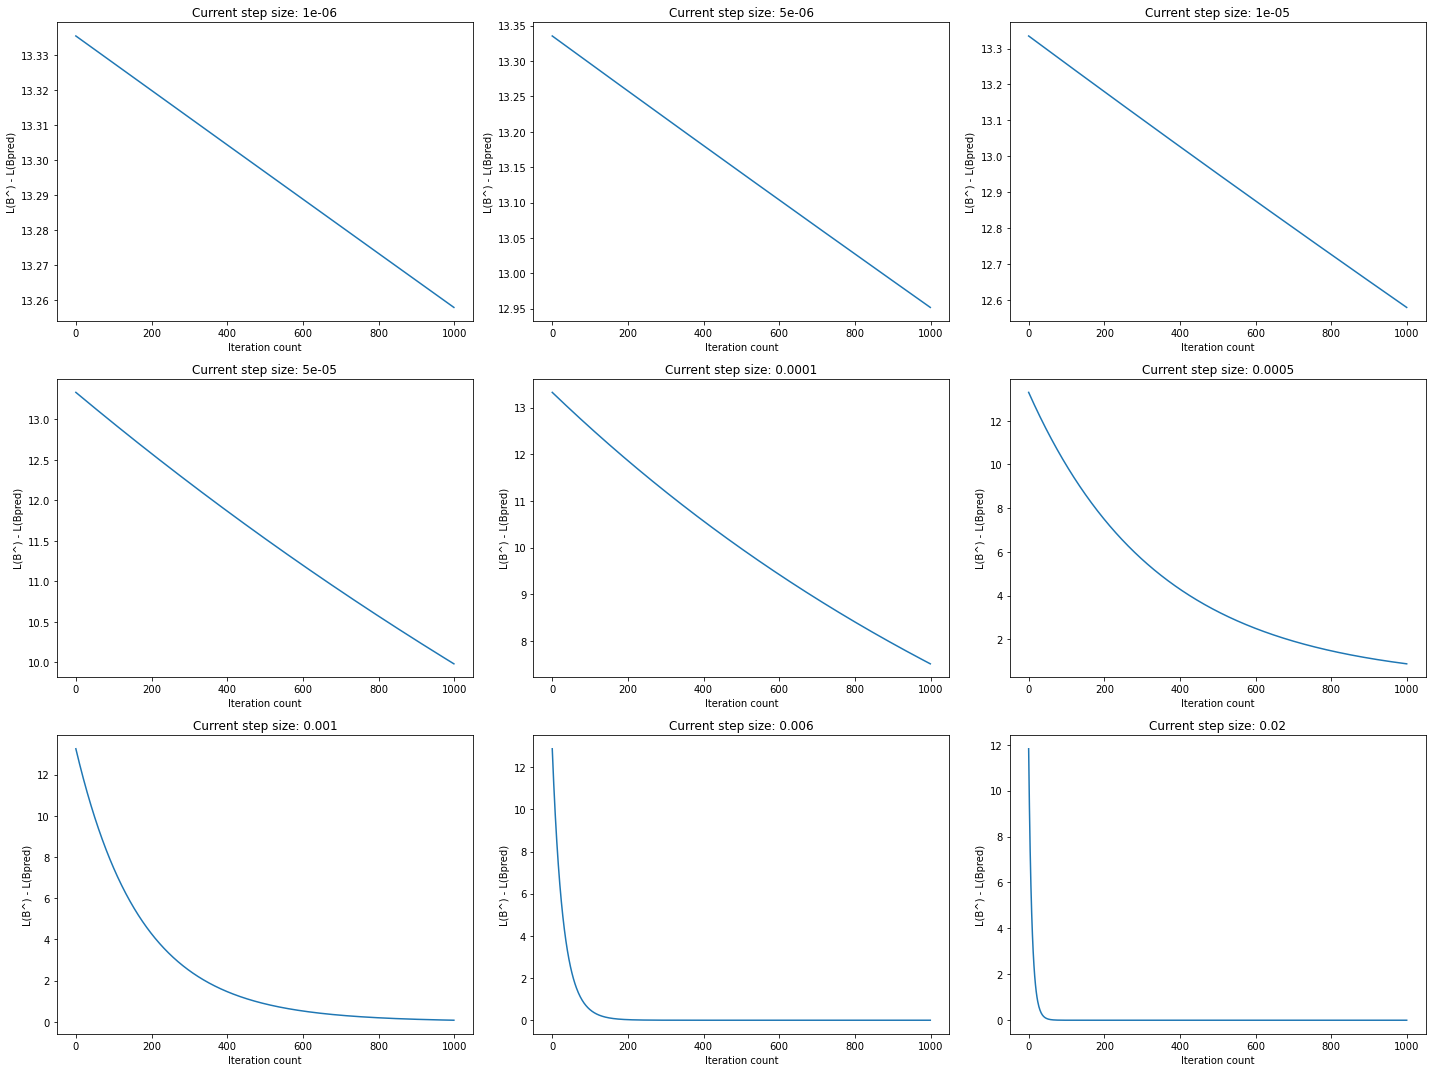

In [85]:
#Plotting the results
#reference - https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize = (20,15))
alphas = [0.000001, 0.000005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.006, 0.02]
for no, alpha in enumerate(alphas):
    j = no // 3 #traversing rows
    i = no % 3 #traversing cols
    axes[j, i].plot(delta_histories[no])
    axes[j, i].set_title(f"Current step size: {alpha}")
    axes[j, i].set_xlabel("Iteration count")
    axes[j, i].set_ylabel("L(B^) - L(Bpred)")
print("Y-axis shows the variation between L(B^) (true B-value) and L(Bpred).")
print("X-axis shows the change in iteration count.")
plt.tight_layout()
plt.savefig("Ridgeregression-batchGD.png")
plt.show()

In [86]:
# Computing train and test MSE
# Remember, n isn't a number!
train_set_MSE = 1/n * np.linalg.norm(Y - X @ beta_histories[-1]) ** 2
test_set_MSE = 1/n * np.linalg.norm(y_test - X_test @ beta_histories[-1]) ** 2
print("Train set MSE :", round(train_set_MSE, 4))
print("Test set MSE :", round(test_set_MSE, 4))
print("These MSEs were achieved with step-size = 0.02.")
print("This results in the quickest convergence, but a higher step size might cause the loss function to oscillate in the case of noisy data.")

Train set MSE : 4.5589
Test set MSE : 4.3804
These MSEs were achieved with step-size = 0.02.
This results in the quickest convergence, but a higher step size might cause the loss function to oscillate in the case of noisy data.


In [87]:
print("As we can see from the B-pred resulting after 1000 iterations of various step sizes, we can see that alpha = 0.006 and alpha = 0.02 were the only ones to converge within 1000 iterations.")

As we can see from the B-pred resulting after 1000 iterations of various step sizes, we can see that alpha = 0.006 and alpha = 0.02 were the only ones to converge within 1000 iterations.


In [88]:
print("Therefore, I think that step-size = 0.02 is the best choice for batch GD on this dataset.")

Therefore, I think that step-size = 0.02 is the best choice for batch GD on this dataset.
